# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '/Users/xiehuizhu/Downloads/2020ML/Day_004/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243 # 記錄異常
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
app_train.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
SK_ID_CURR,1.000000,-0.002108,0.001654,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,...,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659,0.001368
TARGET,-0.002108,1.000000,-0.030896,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,...,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930,-0.045987
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241544,-0.185850,...,-0.005190,-0.007308,0.055821,0.000453,-0.005118,-0.015296,-0.014369,-0.021962,-0.052494,-0.054967
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141588,0.120310,...,0.002184,0.007299,0.006741,0.002669,0.000572,0.000242,0.020477,-0.009936,-0.036345,-0.154778
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005225,-0.045537,...,-0.019364,-0.025130,-0.000173,-0.004120,-0.009267,0.007474,-0.004480,0.015451,0.067451,0.070107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.015296,0.000242,0.007474,-0.002436,0.002387,-0.001275,0.013881,-0.001007,...,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917,0.003043
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.014369,0.020477,-0.004480,-0.010808,0.024700,0.054451,0.039148,0.056422,...,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975,-0.034111
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.021962,-0.009936,0.015451,-0.007836,0.004859,0.015925,0.010124,0.016432,...,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208,0.015252
AMT_REQ_CREDIT_BUREAU_YEAR,0.004659,0.019930,-0.052494,-0.036345,0.067451,-0.041550,0.011690,-0.048448,-0.011320,-0.050998,...,-0.007009,-0.012126,-0.005457,-0.004597,-0.003355,0.018917,-0.004975,0.076208,1.000000,0.050001


In [7]:
corr = app_train.corr()['TARGET'].sort_values()

In [8]:
corr[:5] # 最小

EXT_SOURCE_3         -0.178919
EXT_SOURCE_2         -0.160472
EXT_SOURCE_1         -0.155317
DAYS_BIRTH           -0.078239
DAYS_EMPLOYED_ANOM   -0.045987
Name: TARGET, dtype: float64

In [9]:
corr[-6:-1] # 最大

DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
Name: TARGET, dtype: float64

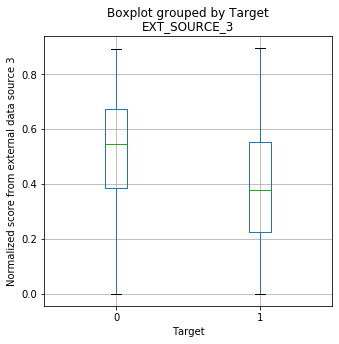

Correlation: -0.1789


In [10]:
app_train.boxplot(column = 'EXT_SOURCE_3', by = 'TARGET', showfliers = False, figsize = (5, 5))
plt.xlabel('Target')
plt.ylabel('Normalized score from external data source 3')
plt.suptitle('Boxplot grouped by Target')
plt.show()

print('Correlation: %.4f' % (corr[corr.index == 'EXT_SOURCE_3']))

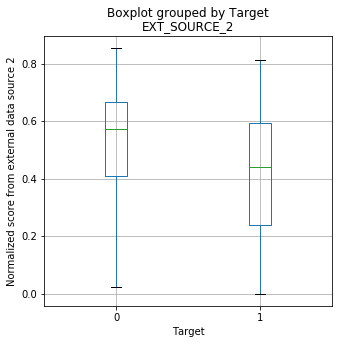

Correlation: -0.1605


In [11]:
app_train.boxplot(column = 'EXT_SOURCE_2', by = 'TARGET', showfliers = False, figsize = (5, 5))
plt.xlabel('Target')
plt.ylabel('Normalized score from external data source 2')
plt.suptitle('Boxplot grouped by Target')
plt.show()

print('Correlation: %.4f' % (corr[corr.index == 'EXT_SOURCE_2']))

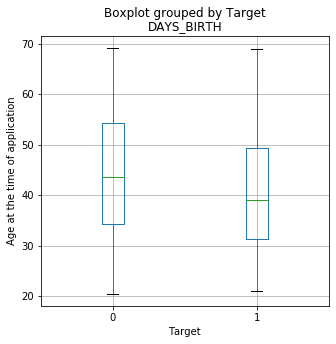

Correlation: -0.0782


In [12]:
app_train['DAYS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_train.boxplot(column = 'DAYS_BIRTH', by = 'TARGET', showfliers = False, figsize = (5, 5))
plt.xlabel('Target')
plt.ylabel('Age at the time of application')
plt.suptitle('Boxplot grouped by Target')
plt.show()

print('Correlation: %.4f' % (corr[corr.index == 'DAYS_BIRTH']))

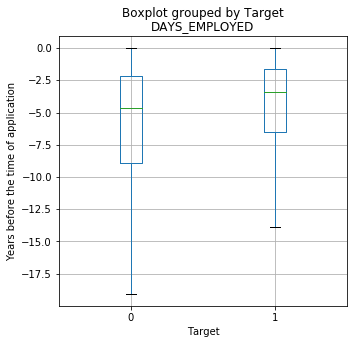

Correlation: 0.0750


In [13]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'] / 365
app_train.boxplot(column = 'DAYS_EMPLOYED', by = 'TARGET', showfliers = False, figsize = (5, 5))
plt.xlabel('Target')
plt.ylabel('Years before the time of application')
plt.suptitle('Boxplot grouped by Target')
plt.show()

print('Correlation: %.4f' % (corr[corr.index == 'DAYS_EMPLOYED']))

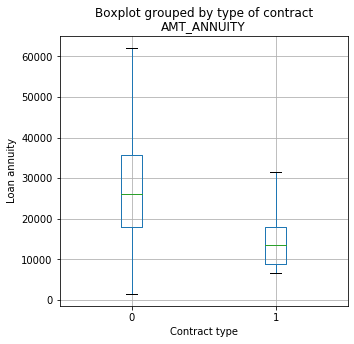

Correlation: -0.2415


In [14]:
app_train.boxplot(column = 'AMT_ANNUITY', by = 'NAME_CONTRACT_TYPE', showfliers = False, figsize = (5, 5))
plt.xlabel('Contract type')
plt.ylabel('Loan annuity')
plt.suptitle('Boxplot grouped by type of contract')
plt.show()

annuity_cor = app_train.corr()['AMT_ANNUITY']
print('Correlation: %.4f' % (annuity_cor[annuity_cor.index == 'NAME_CONTRACT_TYPE']))

In [15]:
annuity_cor.sort_values(ascending = False).head(n = 10)

AMT_ANNUITY         1.000000
AMT_GOODS_PRICE     0.775109
AMT_CREDIT          0.770138
AMT_INCOME_TOTAL    0.191657
FLAG_OWN_CAR        0.141588
FLAG_DOCUMENT_8     0.130584
FLOORSMAX_AVG       0.130174
FLOORSMAX_MEDI      0.129179
FLOORSMAX_MODE      0.126302
EXT_SOURCE_2        0.125804
Name: AMT_ANNUITY, dtype: float64

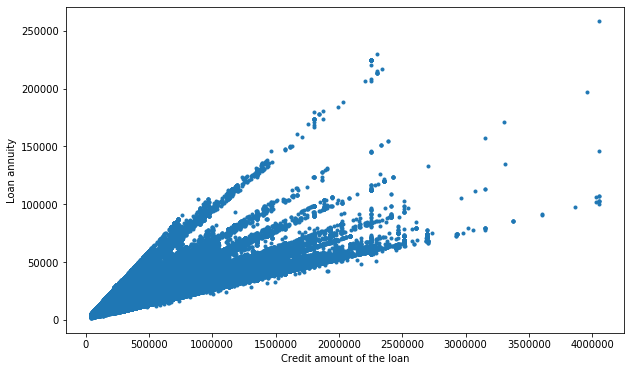

Correlation: 0.7701


In [16]:
plt.figure(figsize = (10, 6))
plt.plot(app_train['AMT_CREDIT'], app_train['AMT_ANNUITY'], '.')
plt.xlabel('Credit amount of the loan')
plt.ylabel('Loan annuity')
plt.show()

print('Correlation: %.4f' % (annuity_cor[annuity_cor.index == 'AMT_CREDIT']))